# 14주차 실습: 딥러닝 플랫폼, 텐서플로

## 붓꽃 데이터 분류에 딥러닝 적용하기

In [1]:
# 붓꽃 데이터 불러오기
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [2]:
# 데이터 분리 및 형태 확인
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)

# 학습 데이터와 테스트 데이터의 형태와 개별 훈련 데이터의 형태를 살펴보기
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)


In [4]:
# 순차 모델 생성
from tensorflow import keras

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(3, activation= 'softmax'),
])

In [5]:
# 모델 컴파일
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
24/24 - 1s - loss: 1.2309 - accuracy: 0.3167 - 602ms/epoch - 25ms/step
Epoch 2/30
24/24 - 0s - loss: 0.9781 - accuracy: 0.3667 - 40ms/epoch - 2ms/step
Epoch 3/30
24/24 - 0s - loss: 0.8498 - accuracy: 0.6667 - 44ms/epoch - 2ms/step
Epoch 4/30
24/24 - 0s - loss: 0.7744 - accuracy: 0.7083 - 43ms/epoch - 2ms/step
Epoch 5/30
24/24 - 0s - loss: 0.6861 - accuracy: 0.7167 - 42ms/epoch - 2ms/step
Epoch 6/30
24/24 - 0s - loss: 0.6145 - accuracy: 0.8417 - 42ms/epoch - 2ms/step
Epoch 7/30
24/24 - 0s - loss: 0.5676 - accuracy: 0.7000 - 39ms/epoch - 2ms/step
Epoch 8/30
24/24 - 0s - loss: 0.5289 - accuracy: 0.8500 - 50ms/epoch - 2ms/step
Epoch 9/30
24/24 - 0s - loss: 0.4940 - accuracy: 0.8167 - 41ms/epoch - 2ms/step
Epoch 10/30
24/24 - 0s - loss: 0.4802 - accuracy: 0.7333 - 44ms/epoch - 2ms/step
Epoch 11/30
24/24 - 0s - loss: 0.4576 - accuracy: 0.9250 - 38ms/epoch - 2ms/step
Epoch 12/30
24/24 - 0s - loss: 0.4332 - accuracy: 0.8000 - 42ms/epoch - 2ms/step
Epoch 13/30
24/24 - 0s - loss: 0.41

In [7]:
# 신경망 학습 결과
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 40ms/step - loss: 0.2238 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도 : 1.0


In [8]:
# 성능 향상을 위해 층을 추가
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 166ms/step - loss: 0.0632 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도 : 1.0


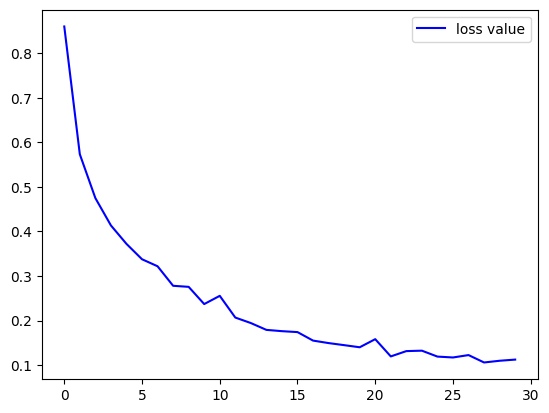

In [9]:
# 학습 과정에 따른 손실함수의 변화 출력
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

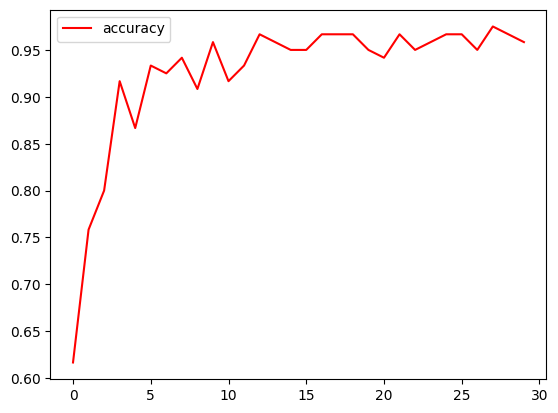

In [10]:
# 학습 과정에 따른 정확도의 변화 출력
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

In [11]:
# 이미 학습을 마친 모델을 저장 : save()
# .h5 파일 : 모델 및 가중치를 모두 포함함
model.save('./iris_60x30_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# 저장된 모델 불러오기 : keras.models.load_model()
# 모델의 요약 정보 : summary()
loaded =keras.models.load_model('./iris_60x30_model.h5')
loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 60)                300       
                                                                 
 dense_5 (Dense)             (None, 30)                1830      
                                                                 
 dense_6 (Dense)             (None, 3)                 93        
                                                                 
Total params: 2223 (8.68 KB)
Trainable params: 2223 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
